<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U keras --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.4 MB/s eta 0:00:00


# 第9章 深層学習

ディープニューラルネットワークを用いて識別問題をコーディングします。Google ColabでGPUを使用するときは、「ランタイム」->「ランタイムのタイプを変更」-> ハードウェアアクセラレータ -> GPU を選びます。


## 畳み込みネットワークによる画像認識

## 例題9.1

Keras を用いて CNN で Fashion-MNIST データの識別と評価を行え．

必要なライブラリ等を読み込みます。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers

データの読み込み

* Fasion MNISTデータ（学習用60000事例、評価用10000事例、それぞれ28x28の行列）を使います。


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

num_classes = np.unique(y_train).size  # 10
input_shape = X_train.shape[1:]        # (28, 28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# 正解ラベル
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

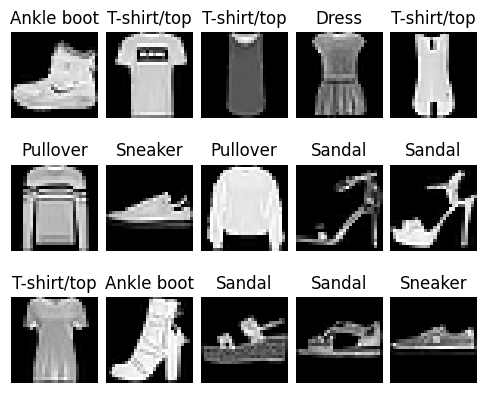

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(6, 5))
axes = axes.ravel()

for i in range(15):    # 3行5列の15枚の画像を表示
    axes[i].set_title(class_names[y_train[i]])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

入力を3次元テンソルから4次元テンソルに変換します。各次元は、データ数、縦のピクセル数、横のピクセル数、チャネル数（グレースケール画像は1）を表します。また、特徴値のとりうる範囲を0-255から0-1に変換します。

In [6]:
X_train = X_train.reshape(X_train.shape[0] , 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

畳み込みネットワークで学習します。モデルのパラメータ数で構造を確認してください。

In [7]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

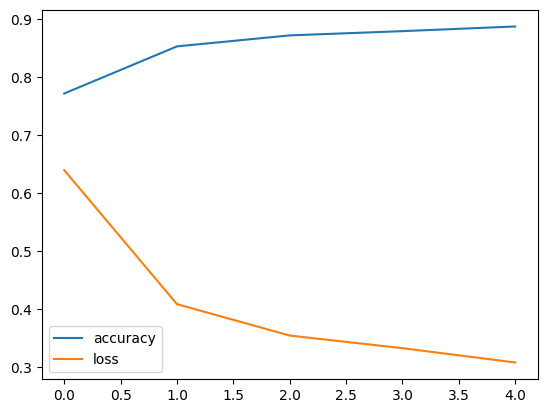

In [8]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model1.fit(X_train, y_train, epochs=5, batch_size=200, verbose=0)
pd.DataFrame(history.history)[['accuracy', 'loss']].plot()
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

In [9]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8827 - loss: 0.3267
Test accuracy: 0.8827


### 参考

Dropoutを入れます。ユニットの半数が消えている状態で学習を行うので、epochは倍の回数をとります。

In [10]:
model1b = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model1b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6802 - loss: 0.8779 - val_accuracy: 0.8040 - val_loss: 0.5117
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7869 - loss: 0.5739 - val_accuracy: 0.8370 - val_loss: 0.4382
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.5099 - val_accuracy: 0.8562 - val_loss: 0.3970
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8286 - loss: 0.4711 - val_accuracy: 0.8652 - val_loss: 0.3724
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8418 - loss: 0.4405 - val_accuracy: 0.8673 - val_loss: 0.3595
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 0.4195 - val_accuracy: 0.8747 - val_loss: 0.3381
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8539 - loss: 0.4056 - val_accuracy: 0.8782 - val_loss: 0.3299
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3925 - val_accuracy: 0.

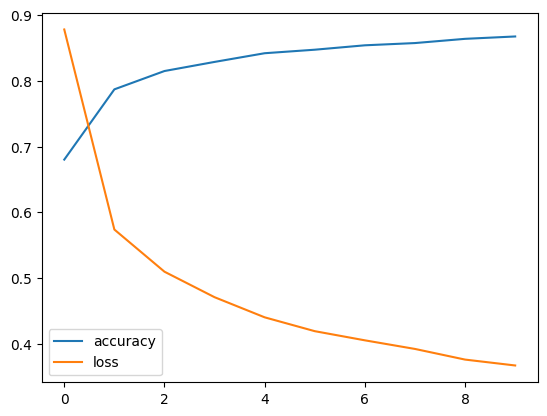

In [11]:
model1b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1b.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.1)
pd.DataFrame(history.history)[['accuracy', 'loss']].plot()
plt.show()

評価用データで評価します。

In [12]:
test_loss, test_acc = model1b.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8831 - loss: 0.3107
Test accuracy: 0.8831


## リカレントニューラルネットワークによる自然言語処理


### 例題9.2

Keras を用いて RNN で IMDB データに対して PN 判定を行え．ただし，処理の軽減のために頻度上位 10000 語を対象とし，データの大きさは先頭の50単語に限定すること．

### IMDBデータ

映画のレビューに対して、P/N(肯定/否定)のラベルが付いた学習データです。学習用に25000事例、評価用に25000事例用意されていて、PNの割合はそれぞれ50%です。
各レビューは単語列ではなく、単語インデックスの系列として表現されています。

ここでは、頻度上位10000語を対象とし、データの大きさは先頭の50単語に限定します。

必要なライブラリ等を読み込みます。

In [13]:
max_features = 10000
maxlen = 50
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


単語インデックスを単語に戻して、元のデータを確認します。インデックスは"padding", "start of sequence","unknown"にそれぞれ0,1,2が割り当てられているので、3つずらして対応させます。

In [14]:
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


"grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"

In [15]:
y_train[0]

np.int64(1)

単純なRNNを構成して学習させます。

In [16]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(50,)),
    keras.layers.Embedding(max_features, 128),
    keras.layers.SimpleRNN(64),
    keras.layers.Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,417 (4.93 MB)

 Trainable params: 1,292,417 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model1.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - acc: 0.7042 - loss: 0.5437 - val_acc: 0.7784 - val_loss: 0.4563
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8591 - loss: 0.3345 - val_acc: 0.7748 - val_loss: 0.4819


In [18]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7799 - loss: 0.4781
Test accuracy: 0.7799


双方向LSTMを試します。

In [19]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(50,)),
    keras.layers.Embedding(max_features, 128),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model2.fit(X_train, y_train, epochs=2, batch_size=32,validation_split=0.1)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.7760 - loss: 0.4564 - val_acc: 0.8220 - val_loss: 0.3947
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.8695 - loss: 0.3024 - val_acc: 0.8168 - val_loss: 0.4025


In [21]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8160 - loss: 0.4110
Test accuracy: 0.816


## 演習問題


### 9.1

例題 9.1 の CNN において，使用するデータを CIFAR-10 データ（https://keras.io/api/datasets/cifar10/） に変更し，いくつかのネットワーク構造について認識，評価を行え．

CIFAR-10は画像認識用のデータセットです。10種類のカテゴリの画像が含まれています。

In [22]:
cf10 = keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


学習用データは50000枚の32x32画像で、カラーなので3チャンネルからなります。

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
target_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

学習用データからランダムに25枚を表示します。

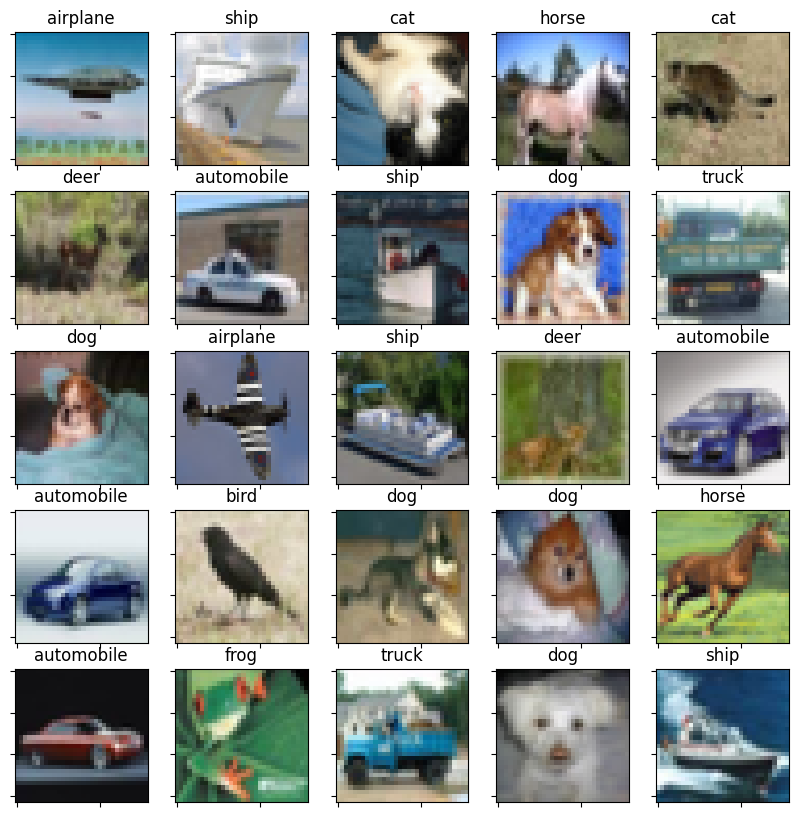

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num = np.random.randint(0,X_train.shape[0])
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[rand_num])
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title(target_names[y_train[rand_num][0]])
plt.show()

入力値を0～1に、出力をone-hotベクトルにします。

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

単純なCNNで認識してみます。

In [30]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,018 (621.16 KB)

 Trainable params: 159,018 (621.16 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model1.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4162 - loss: 1.6221 - val_accuracy: 0.5338 - val_loss: 1.3229
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5548 - loss: 1.2590 - val_accuracy: 0.5924 - val_loss: 1.1632
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6003 - loss: 1.1441 - val_accuracy: 0.6018 - val_loss: 1.1345
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6280 - loss: 1.0649 - val_accuracy: 0.6344 - val_loss: 1.0457
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6501 - loss: 1.0029 - val_accuracy: 0.6446 - val_loss: 1.0216


In [33]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6409 - loss: 1.0355
Test accuracy: 0.6409000158309937


バッチ正規化とドロップアウトを入れてみます。ドロップアウトでは半数のユニットが消えているので、epochは倍の回数をとります。

In [34]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,146 (621.66 KB)

 Trainable params: 159,082 (621.41 KB)

 Non-trainable params: 64 (256.00 B)

In [35]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.1)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3860 - loss: 1.6947 - val_accuracy: 0.3948 - val_loss: 1.9300
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5180 - loss: 1.3449 - val_accuracy: 0.4796 - val_loss: 1.5776
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5633 - loss: 1.2251 - val_accuracy: 0.5970 - val_loss: 1.1832
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5939 - loss: 1.1510 - val_accuracy: 0.6214 - val_loss: 1.1076
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6151 - loss: 1.0888 - val_accuracy: 0.6362 - val_loss: 1.0500
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6288 - loss: 1.0483 - val_accuracy: 0.6434 - val_loss: 1.0188
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6419 - loss: 1.0070 - val_accuracy: 0.5662 - val_loss: 1.2590
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6545 - loss: 0.9806 - val_accuracy: 0.

In [36]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6709 - loss: 0.9510
Test accuracy: 0.671


演習問題の解答としたコード

In [37]:
cf10 = keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

target_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.1, verbose=0)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.647


### 9.2

例題 9.2 の RNN において，使用するデータをロイターのニュースワイヤーデータに変更し，いくつかのネットワーク構造について認識，評価を行え．


In [38]:
max_features = 10000
maxlen = 50
(X_train, y_train), (X_test, y_test) = keras.datasets.reuters.load_data(num_words=max_features)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


単語インデックスを単語に戻して、元のデータを確認します。インデックスは"padding", "start of sequence","unknown"にそれぞれ0,1,2が割り当てられているので、3つずらして対応させます。

In [39]:
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step


'company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [40]:
y_train = keras.utils.to_categorical(y_train, 46)
y_test = keras.utils.to_categorical(y_test, 46)

単純なRNNを構成して学習させます。

In [41]:
model3 = keras.Sequential([
    keras.layers.Input(shape=(50,)),
    keras.layers.Embedding(max_features, 128),
    keras.layers.SimpleRNN(64),
    keras.layers.Dense(46, activation='softmax')
])
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,295,342 (4.94 MB)

 Trainable params: 1,295,342 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model3.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - acc: 0.3755 - loss: 2.3156 - val_acc: 0.4427 - val_loss: 2.0065
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5675 - loss: 1.6628 - val_acc: 0.4727 - val_loss: 1.9002
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7197 - loss: 1.1709 - val_acc: 0.5117 - val_loss: 1.8930
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8313 - loss: 0.7638 - val_acc: 0.5451 - val_loss: 1.8854
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8934 - loss: 0.5054 - val_acc: 0.5172 - val_loss: 2.0802


In [43]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f'Test accuracy:, {test_acc:.3f}')

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.5240 - loss: 2.0408
Test accuracy:, 0.524


bi-LSTMに変更します。

In [44]:
model4 = keras.Sequential([
    keras.layers.Input(shape=(50,)),
    keras.layers.Embedding(max_features, 128),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(46, activation='softmax')
])
model4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,384,750 (5.28 MB)

 Trainable params: 1,384,750 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model4.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.5014 - loss: 1.9725 - val_acc: 0.5551 - val_loss: 1.7593
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.5928 - loss: 1.5892 - val_acc: 0.6129 - val_loss: 1.6034
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.6823 - loss: 1.2867 - val_acc: 0.6329 - val_loss: 1.4451
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.7510 - loss: 0.9869 - val_acc: 0.6585 - val_loss: 1.3823
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.7996 - loss: 0.7962 - val_acc: 0.6741 - val_loss: 1.3626


In [46]:
test_loss, test_acc = model4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6607 - loss: 1.4076
Test accuracy: 0.6607301831245422


演習問題の解答としたコード

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

max_features = 10000
maxlen = 50
(X_train, y_train), (X_test, y_test) = keras.datasets.reuters.load_data(num_words=max_features)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
y_train = keras.utils.to_categorical(y_train, 46)
y_test = keras.utils.to_categorical(y_test, 46)

model = keras.Sequential([
    keras.layers.Input(shape=(50,)),
    keras.layers.Embedding(max_features, 128),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy:, {test_acc:.3f}')


Test accuracy:, 0.651
